In [4]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.5"
export JULIA_PKG_PRECOMPILE_AUTO=0
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  echo "Installing PyCall.jl..."
  julia -e 'using Pkg; Pkg.add("PyCall"); Pkg.build("PyCall")'
  julia -e 'println("Success")'

fi


Installing Julia 1.8.5 on the current Colab Runtime...
2023-12-01 09:27:54 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.8/julia-1.8.5-linux-x86_64.tar.gz [130873886/130873886] -> "/tmp/julia.tar.gz" [1]
Installing PyCall.jl...
  Installing known registries into `~/.julia`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed VersionParsing ── v1.3.0
   Installed Parsers ───────── v2.8.0
   Installed Conda ─────────── v1.10.0
   Installed PyCall ────────── v1.96.2
   Installed MacroTools ────── v0.5.11
   Installed Preferences ───── v1.4.1
   Installed PrecompileTools ─ v1.2.0
   Installed JSON ──────────── v0.21.4
    Updating `~/.julia/environments/v1.8/Project.toml`
  [438e738f] + PyCall v1.96.2
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [8f4d0f93] + Conda v1.10.0
  [682c06a0] + JSON v0.21.4
  [1914dd2f] + MacroTools v0.5.11
  [69de0a69] + Parsers v2.8.0
  [aea7be01] + PrecompileTools v1.2.0
  [21216c

In [5]:

%pip install -Uq pysr pytorch_lightning

from julia import Julia

julia = Julia(compiled_modules=False, threads="auto")
from julia import Main
from julia.tools import redirect_output_streams

redirect_output_streams()

import pysr

# We don't precompile in colab because compiled modules are incompatible static Python libraries:
pysr.install(precompile=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 37.2 MB/s eta 0:00:00
Julia Version 1.8.5
Commit 17cfb8e65ea (2023-01-08 06:45 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 22.04.3 LTS
  uname: Linux 5.15.120+ #1 SMP Wed Aug 30 11:19:59 UTC 2023 x86_64 x86_64
  CPU: Intel(R) Xeon(R) CPU @ 2.20GHz: 
              speed         user         nice          sys         idle          irq
       #1  2199 MHz       3207 s          0 s        723 s      15554 s          0 s
       #2  2199 MHz       3062 s          0 s        710 s      15678 s          0 s
  Memory: 12.6783447265625 GB (10922.7734375 MB free)
  Uptime: 1966.0 sec
  Load Avg:  1.51  0.96  0.52
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT

[ Info: Julia version info
[ Info: Julia executable: /usr/local/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /usr/bin/python3
│     libpython: /usr/lib/x86_64-linux-gnu/libpython3.10.so.1.0
│ Python:
│     python: /usr/bin/python3
└     libpython: 
    Updating registry at `~/.julia/registries/General.toml`
     Cloning git-repo `https://github.com/MilesCranmer/SymbolicRegression.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed ScientificTypesBase ────────────── v3.0.0
   Installed BitTwiddlingConvenienceFunctions ─ v0.1.5
   Installed Tricks ─────────────────────────── v0.1.8
   Installed DiffRules ──────────────────────── v1.15.1
   Installed DynamicExpressions ─────────────── v0.13.1
   Installed CpuId ──────────────────────────── v0.3.1
   Installed MLJModelInterface 

In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
%cd /content/drive/Shareddrives/Neutrino Symbolic Representation/Colab

/content/drive/Shareddrives/Neutrino Symbolic Representation/Colab


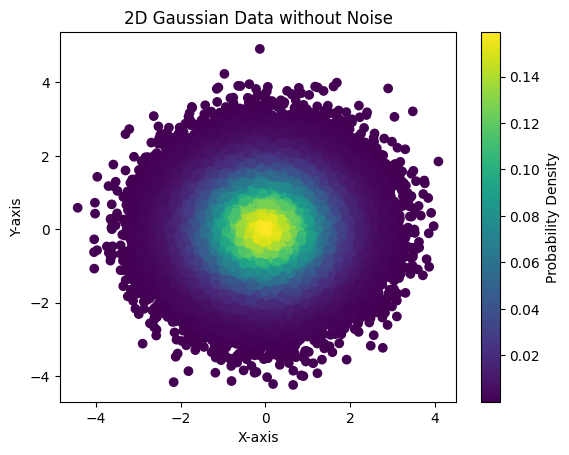

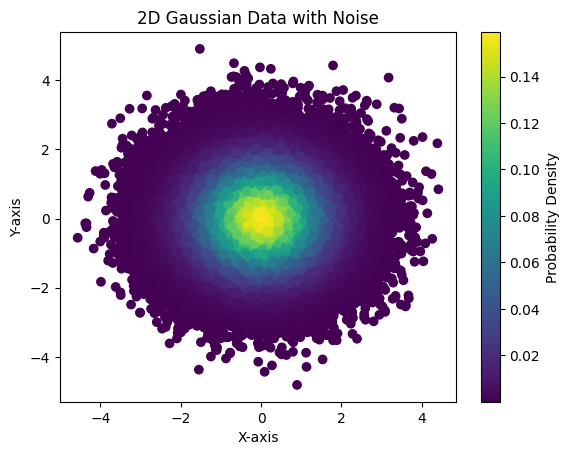

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

# Importing the modified Gaussian data generation functions
from gaussian_data_generator import generate_1d_gaussian_data_with_noise, generate_2d_gaussian_data_with_noise

# Parameters for Gaussian data
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Identity covariance matrix
num_samples = 100000
noise_std = 0.4  # Standard deviation for Gaussian noise

# Generate 2D Gaussian data without noise
data_2d, prob_density = generate_2d_gaussian_data_with_noise(mean, cov, num_samples)

# Plot 2D Gaussian data without noise
plt.scatter(data_2d[:,0], data_2d[:,1], c=prob_density, cmap='viridis')
plt.title('2D Gaussian Data without Noise')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Probability Density')
plt.show()

# Generate 2D Gaussian data with noise
data_2d_noise, prob_density_noise = generate_2d_gaussian_data_with_noise(mean, cov, num_samples, noise_std)

# Plot 2D Gaussian data with noise
plt.scatter(data_2d_noise[:,0], data_2d_noise[:,1], c=prob_density_noise, cmap='viridis')
plt.title('2D Gaussian Data with Noise')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.colorbar(label='Probability Density')
plt.show()


In [15]:
# Split data for NN training
X_train, X_test, y_train, y_test = train_test_split(data_2d, prob_density, test_size=0.2, random_state=42)

# Create a simple NN model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=200,batch_size= 32, verbose=1)

# Predict using NN
y_nn_pred = nn_model.predict(X_test)

# Now, we fit the PySRRegressor to the NN predictions
model = PySRRegressor(
    niterations=30,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"]
)

model.fit(X_test, y_nn_pred.reshape(-1))

# Print the best equation found
print(model.get_best())

print(model.sympy())


Epoch 1/200
2500/2500 [==============================] - 12s 4ms/step - loss: 6.5514e-05
Epoch 2/200
2500/2500 [==============================] - 15s 6ms/step - loss: 5.6513e-06
Epoch 3/200
2500/2500 [==============================] - 26s 10ms/step - loss: 3.4619e-06
Epoch 4/200
2500/2500 [==============================] - 17s 7ms/step - loss: 1.3997e-06
Epoch 5/200
2500/2500 [==============================] - 10s 4ms/step - loss: 1.3283e-06
Epoch 6/200
2500/2500 [==============================] - 8s 3ms/step - loss: 7.8321e-07
Epoch 7/200
2500/2500 [==============================] - 6s 2ms/step - loss: 7.4423e-07
Epoch 8/200
2500/2500 [==============================] - 7s 3ms/step - loss: 5.5024e-07
Epoch 9/200
2500/2500 [==============================] - 7s 3ms/step - loss: 4.7638e-07
Epoch 10/200
2500/2500 [==============================] - 6s 2ms/step - loss: 4.7204e-07
Epoch 11/200
2500/2500 [==============================] - 9s 4ms/step - loss: 3.4493e-07
Epoch 12/200
2500/2500 [

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1919: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
Started!

Expressions evaluated per second: 0.000e+00
Head worker occupation: 0.0%
Progress: 0 / 450 total iterations (0.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.750e+03
Head worker occupation: 4.2%
Progress: 13 / 450 total iterations (2.889%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity

With noise

In [16]:
import numpy as np
from scipy.stats import multivariate_normal
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pysr import PySRRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_2d_noise, prob_density_noise, test_size=0.2, random_state=42)

# Create a simple NN model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(64, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train, y_train, epochs=100,batch_size= 32, verbose=1)

# Predict using NN
y_nn_pred = nn_model.predict(X_test)

# Now, we fit the PySRRegressor to the NN predictions
model = PySRRegressor(
    niterations=40,
    binary_operators=["plus", "mult"],
    unary_operators=["exp"]
)

model.fit(X_test, y_nn_pred.reshape(-1))

# Print the best equation found
print(model.get_best())

print(model.sympy())


Epoch 1/100
2500/2500 [==============================] - 9s 3ms/step - loss: 1.8682e-04
Epoch 2/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5401e-05
Epoch 3/100
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1540e-05
Epoch 4/100
2500/2500 [==============================] - 8s 3ms/step - loss: 7.5980e-06
Epoch 5/100
2500/2500 [==============================] - 6s 2ms/step - loss: 4.2628e-06
Epoch 6/100
2500/2500 [==============================] - 7s 3ms/step - loss: 2.4042e-06
Epoch 7/100
2500/2500 [==============================] - 7s 3ms/step - loss: 1.5847e-06
Epoch 8/100
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2048e-06
Epoch 9/100
2500/2500 [==============================] - 8s 3ms/step - loss: 1.0052e-06
Epoch 10/100
2500/2500 [==============================] - 5s 2ms/step - loss: 6.5844e-07
Epoch 11/100
2500/2500 [==============================] - 6s 2ms/step - loss: 5.9658e-07
Epoch 12/100
2500/2500 [======

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1346: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1919: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/julia_helpers.py:231: UserWarning: Julia has already started. The new Julia options {'threads': 2} will be ignored.
  warnings.warn(


Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
Started!

Expressions evaluated per second: 9.090e+02
Head worker occupation: 1.2%
Progress: 3 / 600 total iterations (0.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           3.420e-02  1.594e+01  y = -0.10521
2           6.646e-03  1.638e+00  y = exp(-1.9631)
3           2.275e-03  1.072e+00  y = (-0.10521 * -0.78691)
5           2.203e-03  1.619e-02  y = (-0.034694 * (-1.2444 + -0.78691))
7           2.192e-03  2.354e-03  y = ((-0.33201 * 0.34252) * (0.23998 * -2.6973))
9           2.192e-03  1.371e-06  y = (-0.056642 * ((-1.4673 * exp(-0.096445)) * 